### Modify radius function
### Increase the size of A
### apply the new data set

In [25]:
def damp(d,s):
    return math.exp(-(d**d)/2*(s**s))


In [26]:
def hamm_dist(a,b):
    dist = 0
    for i in range(0,len(a)):
        dist = dist +  abs(a[i]-b[i])
    return dist
hamm_dist([0,0,1],[1,0,1])

1

In [27]:
def radius(b,a):
    return int(math.sqrt(b-a))

In [28]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [29]:
train_dum = pd.get_dummies(pd.read_csv('Kartik_SOM.csv'))
train_dum.head()

,Year_Y1,Year_Y2,Year_Y3,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,...,Activity Type_A2,Activity Type_A3,Prime Cause_PC1,Prime Cause_PC2,Prime Cause_PC3,Prime Cause_PC4,Prime Cause_PC5,Prime Cause_PC6,Prime Cause_PC7,Prime Cause_PC8
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


train_df = pd.read_csv('Kartik_SOM.csv')
train_df.head()

train_dum = pd.get_dummies(train_df)
train_dum.head()
train_dum.to_csv('SOM_final_1.csv')

In [33]:
def make_proto(n):
    A = np.zeros((n, 40))
    for i in range(0,n):
        A[:][i] = np.random.rand(40)
    A = pd.DataFrame(A)
    B = np.zeros(n)
    C = np.linspace(1,n,n)
    size = int(math.sqrt(n))
    C = np.reshape(C,(size,size))
    return A,B,C

min_dist = np.zeros(149)
for i in range(0,149):
    dist = [0]*25
    for j in range(0,25):
        dist[j] = hamm_dist(train_dum.iloc[i],A.iloc[j])
        min_dist[i] = dist.index(min(dist))
    B[int(min_dist[i])] += 1
    A.iloc[int(min_dist[i])] += damp(min(dist),4)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(min_dist[i])]))
    for j in range(1,int(radius(i))):
        if int(min_dist[i]-j) > 0:
            A.iloc[int(min_dist[i]-j)] += damp(min(dist),2)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(min_dist[i]-j)]))      
        if int(min_dist[i]+j) < 25 :
            A.iloc[int(min_dist[i]+j)] += damp(min(dist),2)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(min_dist[i]+j)]))      

In [34]:
l = len(train_dum)
t = 25
A,B,C = make_proto(t)
min_dist = np.zeros(l)
assign = np.zeros(l)
for i in range(0,l):
    dist = [0]*t
    for m in range(0,t):
        dist[m] = hamm_dist(train_dum.iloc[i],A.iloc[m])
        min_dist[i] = dist.index(min(dist))
    B[int(min_dist[i])] += 1
    A.iloc[int(min_dist[i])] += damp(min(dist),4)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(min_dist[i])]))
    c = np.array(np.where(C == int(min_dist[i])))
    j = c[0]
    k = c[1]
    p = 1
    if j-p >= 0:
        A.iloc[int(C[j-p,k])] += damp(min(dist),8)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(C[j-p,k])]))
    if j+p < int(math.sqrt(m))-1 :
        A.iloc[int(C[j+p,k])] += damp(min(dist),8)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(C[j+p,k])]))
    if k-p >= 0:
        A.iloc[int(C[j,k-p])] += damp(min(dist),8)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(C[j,k-p])]))
    if k+p < int(math.sqrt(m))-1:
        A.iloc[int(C[j,k+p])] += damp(min(dist),8)*(np.array(train_dum.iloc[i]) - np.array(A.iloc[int(C[j,k+p])]))
    assign[i] = min_dist[i]

In [35]:
A

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.617109,0.868947,0.399778,0.102271,0.299448,0.553582,0.333278,0.065684,0.712037,0.093301,...,0.538941,0.128141,0.331684,0.746585,0.219802,0.986579,0.293012,0.614720,0.560944,0.854817
1,0.227721,0.980129,0.330600,0.778639,0.172287,0.139350,0.216408,0.194273,0.845957,0.840126,...,0.208859,0.653142,0.100561,0.966782,0.809428,0.259612,0.169238,0.577111,0.736192,0.827499
2,0.407275,0.275447,0.575592,0.040988,0.329648,0.607707,0.520903,0.163889,0.279031,0.350496,...,0.895223,0.306460,0.255177,0.735785,0.443795,0.401862,0.087955,0.201531,0.181457,0.900952
3,0.305517,0.194209,0.871403,0.256460,0.797565,0.019765,0.015167,0.306345,0.494632,0.532003,...,0.505027,0.739826,0.021095,0.152728,0.005901,0.194477,0.502950,0.995920,0.018243,0.378916
4,0.755398,0.016859,0.375730,0.494344,0.975040,0.684639,0.555015,0.005146,0.986795,0.537888,...,0.981895,0.347593,0.124468,0.044093,0.058082,0.367526,0.358406,0.179271,0.560949,0.019637
5,0.177355,0.722289,0.241649,0.517054,0.011259,0.713807,0.142642,0.884197,0.167634,0.958379,...,0.138493,0.810434,0.782673,0.819641,0.711983,0.033019,0.761768,0.396735,0.752831,0.270931
6,0.258658,0.932371,0.981243,0.614123,0.220911,0.873163,0.000966,0.144183,0.653553,0.352705,...,0.307264,0.928584,0.753877,0.634341,0.736907,0.499646,0.176480,0.509844,0.171551,0.885276
7,0.375403,0.214371,0.911241,0.372425,0.753083,0.197314,0.942184,0.349663,0.840442,0.658216,...,0.210442,0.128548,0.654204,0.717573,0.143729,0.723520,0.739637,0.104651,0.467307,0.289935
8,0.263237,0.986018,0.676728,0.236001,0.399328,0.044304,0.597379,0.674505,0.428418,0.136207,...,0.267552,0.399612,0.529153,0.288829,0.284400,0.861053,0.690680,0.949532,0.969266,0.827897
9,0.528984,0.167700,0.545796,0.890626,0.223853,0.421769,0.615019,0.254074,0.276193,0.901664,...,0.199698,0.422267,0.816628,0.371492,0.874747,0.146074,0.322475,0.810394,0.502025,0.683011


In [36]:
A.to_csv('for_kmeans.csv')

In [37]:
sum(B)

149.0

In [38]:
assign

array([ 7.,  7.,  7.,  3., 13., 17.,  2., 17.,  7.,  3.,  2.,  7.,  3.,
        3.,  7.,  7.,  4., 17.,  7., 17.,  7., 11.,  7.,  6.,  3.,  7.,
        3., 17.,  6.,  3.,  3., 17.,  3.,  3.,  3.,  6.,  7., 17.,  7.,
        3.,  3., 17., 17.,  7.,  7.,  3.,  3.,  7., 17.,  3.,  7., 17.,
        3., 13.,  7., 17.,  3.,  7., 17., 17., 17., 17.,  3., 18.,  3.,
       17.,  7., 17.,  3., 17., 17.,  6., 17., 17., 17., 17.,  7.,  7.,
       11., 18.,  7.,  7.,  7.,  3.,  3.,  7.,  3.,  1.,  1.,  4.,  6.,
        1.,  5.,  7., 13.,  3.,  5., 13., 21.,  1., 11.,  3.,  5.,  7.,
        5.,  3.,  5.,  1.,  3.,  6.,  5.,  2., 18., 18.,  1.,  1.,  5.,
        7., 11.,  2., 11.,  5., 11.,  4., 19., 11., 11.,  5.,  6.,  3.,
        4., 21., 21., 19., 13.,  7., 12.,  7., 17.,  7., 11.,  3.,  5.,
       13., 22., 23., 23.,  4., 22.])

In [39]:
B = B.reshape([int(math.sqrt(m))+1,int(math.sqrt(m))+1])
B

array([[ 0.,  7.,  4., 30.,  5.],
       [10.,  7., 32.,  0.,  0.],
       [ 0.,  9.,  1.,  6.,  0.],
       [ 0.,  0., 25.,  4.,  2.],
       [ 0.,  3.,  2.,  2.,  0.]])

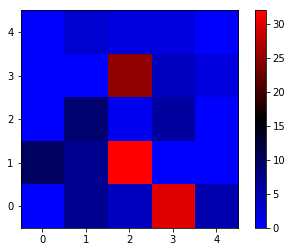

In [40]:
import matplotlib as mpl
from matplotlib import pyplot
import numpy as np

# make values from -5 to 5, for this example
zvals = B

# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['blue','black','red'])
bounds=[-6,-2,2,6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig = pyplot.figure(2)

cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           ['blue','black','red'],
                                           1024)

img2 = pyplot.imshow(zvals,interpolation='nearest',
                    cmap = cmap2,
                    origin='lower')

pyplot.colorbar(img2,cmap=cmap2)

pyplot.show()

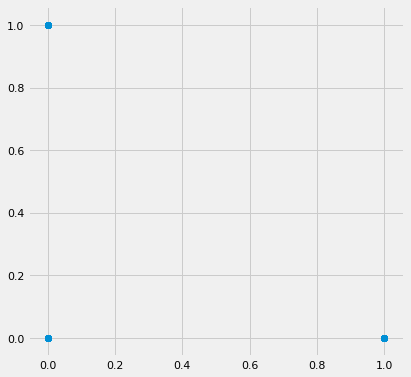

In [41]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('SOM_final.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('')
plt.ylabel('')
plt.title('');

In [42]:
X = pd.read_csv('for_kmeans.csv')
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

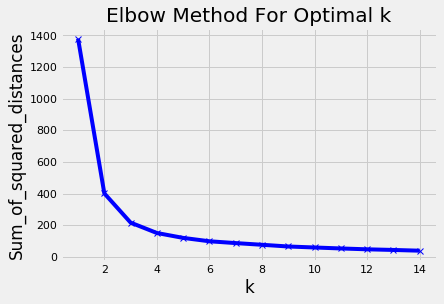

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

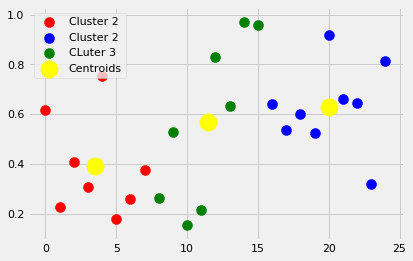

In [44]:
# Applying K-Means to the dataset IBased on the above Elbow plot of WCSS)
# Based on the above Elbow method, we get 5 as number of optimum clusters and thus we take K as 5 for our K-Means model
X = np.array(X)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CLuter 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [45]:
Y = X

In [46]:
X = X.T

In [47]:
X = np.array(X)

In [48]:
X.shape

(41, 25)

In [49]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

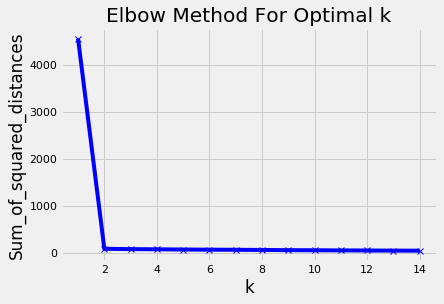

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

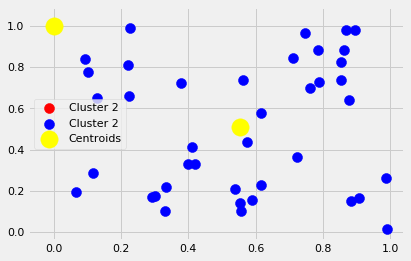

In [51]:
# Applying K-Means to the dataset IBased on the above Elbow plot of WCSS)
# Based on the above Elbow method, we get 5 as number of optimum clusters and thus we take K as 5 for our K-Means model
X = np.array(X)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CLuter 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'CLuter 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
X_init = pd.read_csv('SOM_final.csv')
X = np.array(X_init.T)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
X.shape

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Applying K-Means to the dataset IBased on the above Elbow plot of WCSS)
# Based on the above Elbow method, we get 5 as number of optimum clusters and thus we take K as 5 for our K-Means model
X = np.array(X)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CLuter 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'CLuter 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()